In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data (assuming the file is in the working directory)
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [11]:
# Drop rows with missing values in Date or Price columns
df = df.dropna(subset=['Date', 'Price'])

# Check for duplicate dates and handle them if necessary
df = df.drop_duplicates(subset=['Date'])


In [12]:
# Sort the data by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Display basic information about the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
        Date  Price
0  01-Apr-02  26.06
1  01-Apr-03  27.94
2  01-Apr-04  32.59
3  01-Apr-05  54.14
4  01-Apr-08  98.69


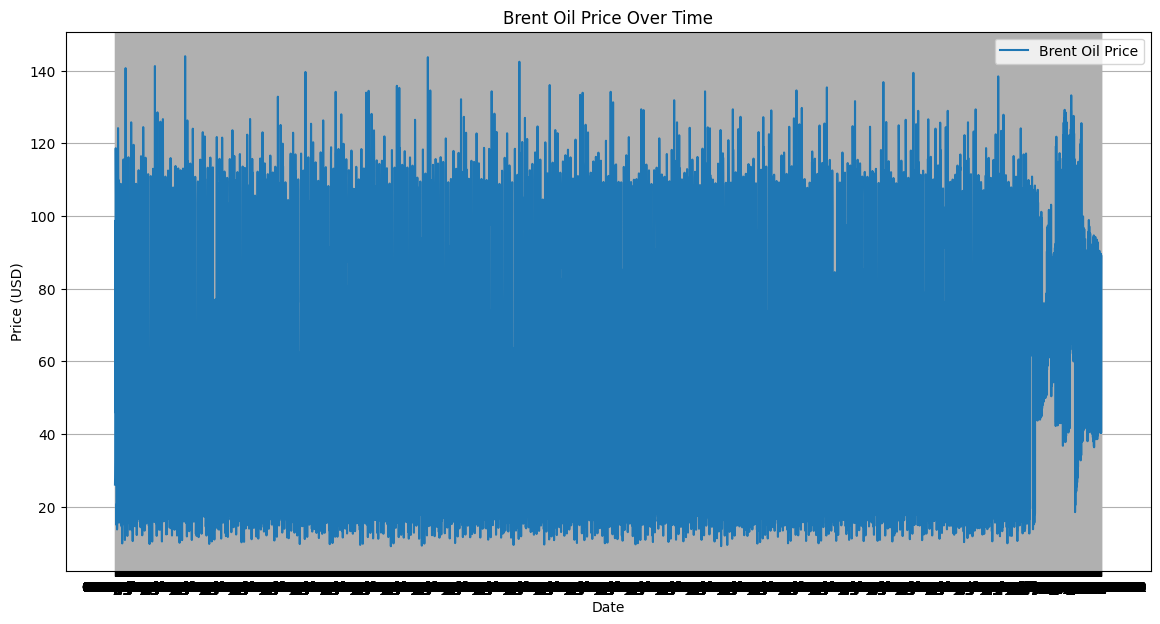

In [ ]:
# Plot the historical Brent oil price trend
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Price Over Time')
plt.grid(True)
plt.show()

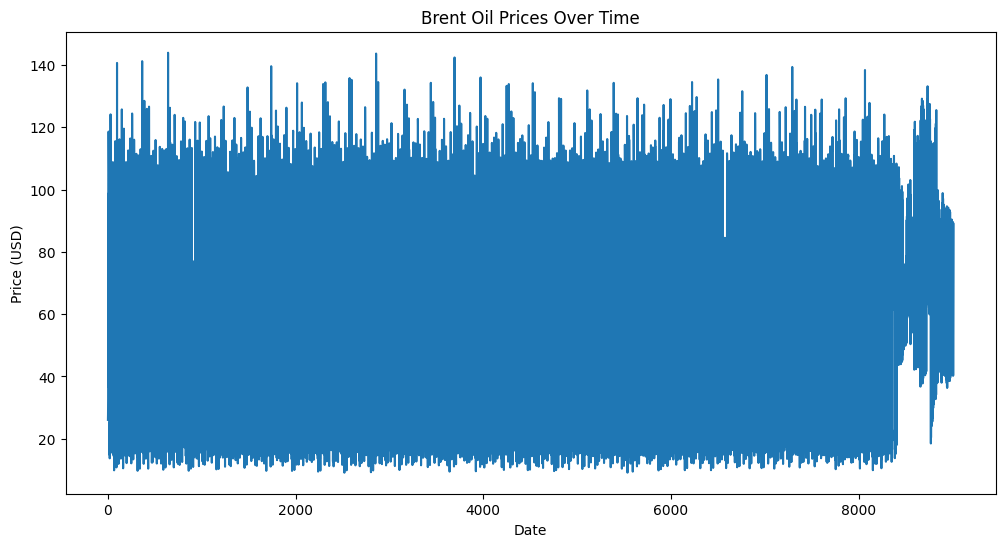

In [14]:
# Plot the oil prices over time
df['Price'].plot(title='Brent Oil Prices Over Time', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [6]:
# Descriptive statistics
print(df['Price'].describe())

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


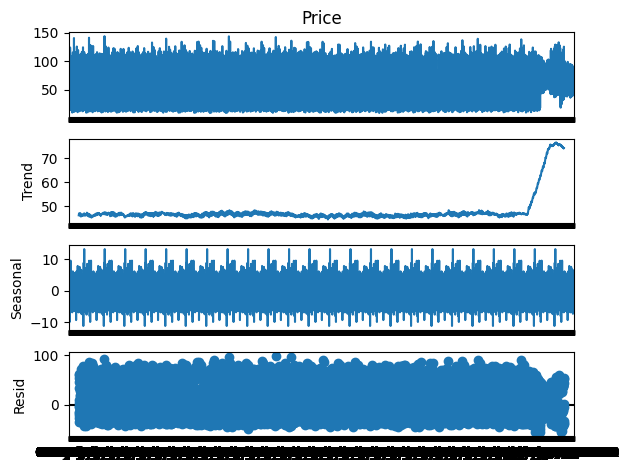

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df.set_index('Date')['Price'], model='additive', period=365)
result.plot()
plt.show()



In [8]:
events = {
    '1987-10-19': 'Black Monday Stock Market Crash',
    '1990-08-02': 'Gulf War begins as Iraq invades Kuwait',
    '1991-01-17': 'Operation Desert Storm begins in Kuwait',
    '1997-07-02': 'Asian Financial Crisis begins in Southeast Asia',
    '1998-08-17': 'Russian Financial Crisis impacts global commodity markets',
    '1999-03-23': 'OPEC agrees to production cuts to counter low oil prices',
    '2001-09-11': 'September 11 Attacks in the U.S. create market uncertainty',
    '2002-12-01': 'Venezuela general strike affects oil exports',
    '2003-03-20': 'Iraq War begins, impacting Middle East oil supply routes',
    '2004-10-23': 'China’s oil demand surges, driving global price increases',
    '2005-08-29': 'Hurricane Katrina disrupts oil production in Gulf of Mexico',
    '2006-07-12': 'Israel-Lebanon conflict creates supply disruptions',
    '2007-01-01': 'Russia briefly cuts oil supply to Belarus, affecting Europe',
    '2007-10-11': 'Global Financial Crisis precursor as stock markets start decline',
    '2008-07-11': 'Oil price peaks at over $147 per barrel due to demand and speculation',
    '2008-09-15': 'Lehman Brothers collapse intensifies Global Financial Crisis',
    '2009-01-01': 'OPEC production cuts begin as a response to financial crisis',
    '2010-04-20': 'BP Deepwater Horizon oil spill in Gulf of Mexico',
    '2010-09-15': 'U.S. enacts Dodd-Frank Act impacting energy commodity speculation',
    '2011-01-25': 'Arab Spring leads to political instability across the Middle East',
    '2011-03-11': 'Japan earthquake and tsunami impacts energy demand and supply',
    '2012-07-01': 'European Union imposes oil embargo on Iran',
    '2014-02-20': 'Ukraine Crisis and sanctions on Russia affect oil supply chains',
    '2014-06-05': 'ISIS gains control of key regions in Iraq, affecting oil production',
    '2014-11-27': 'OPEC decides against production cuts despite falling prices',
    '2015-08-11': 'China devalues yuan, leading to concerns over global demand',
    '2015-11-30': 'Paris Climate Agreement affects long-term fossil fuel policies',
    '2016-01-16': 'U.S. lifts sanctions on Iran, adding oil supply back to the market',
    '2017-06-05': 'Qatar Diplomatic Crisis with neighboring Gulf states',
    '2017-08-25': 'Hurricane Harvey impacts oil production and refining in Texas',
    '2018-05-08': 'U.S. withdraws from Iran nuclear deal, reimposing sanctions',
    '2018-11-04': 'Full U.S. sanctions on Iranian oil exports come into effect',
    '2019-09-14': 'Drone attacks on Saudi Aramco facilities disrupt oil supply',
    '2020-03-09': 'OPEC+ price war between Russia and Saudi Arabia',
    '2020-03-11': 'WHO declares COVID-19 a pandemic, global lockdowns ensue',
    '2020-04-20': 'West Texas Intermediate oil price turns negative due to oversupply',
    '2021-02-15': 'Texas Winter Storm disrupts oil production in the U.S.',
    '2021-06-30': 'OPEC+ agreement on gradual production increase as demand recovers',
    '2021-08-15': 'Taliban takes control of Afghanistan, increasing regional instability',
    '2022-02-24': 'Russia invades Ukraine, triggering sanctions on Russian oil',
    '2022-06-08': 'EU announces phased oil embargo on Russia amid Ukraine crisis',
}
# Convert dictionary to DataFrame
events_df = pd.DataFrame(list(events.items()), columns=['Date', 'Event'])
events_df['Date'] = pd.to_datetime(events_df['Date'])

In [9]:
# Merge event data into main DataFrame
df = pd.merge(df, events_df, on='Date', how='left')
print(df.head(25))

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'Date'. If you wish to proceed you should use pd.concat